<a href="https://colab.research.google.com/github/rnjsdmstj/ITB2022/blob/main/w15_%EA%B8%B0%EB%A7%90%EB%AF%B8%EB%8B%88%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_team12_kes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **22-2 ITB 기말 미니 프로젝트**


**팀명: 12조**

**팀원: 숙명여자대학교 홍보광고학과 이지우, 경영학부 권은서, 김민서**

필수 실행 코드



In [139]:
#한글 깨짐 방지
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

#해당 코드 실행 후 런타임을 다시 실행하면 한글이 깨지지 않음

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 7 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent 

In [140]:
#패키지 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [141]:
#폰트 설정
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

In [142]:
#파일 경로 설정
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Step 1.데이터 전처리**

### **1) charts.csv 전처리**
2019년 11월~2021년 11월까지 2년 간 매월 첫 주차에 해당하는 Top 100 아티스트의 데이터 추출하기


***엑셀을 사용해 charts.csv에 월 주차를 나타내는 변수 week 추가***

```
사용함수 : =WEEKNUM(B2,11)-WEEKNUM(DATE(YEAR(B2),MONTH(B2),1),11)+1
```

***조건 기간(2019년 11월~2021년 11월)에 맞는 행만 남기고 제거하기***



In [143]:
#csv파일 불러오기
charts = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Bigmining/charts_new.csv", encoding='cp949')

In [144]:
#데이터 확인
display(charts.head())

,week,date,rank,song,artist,last-week,peak-rank,weeks-on-board
0,1,2021-11-06,1,Easy On Me,Adele,1.0,1,3
1,1,2021-11-06,2,Stay,The Kid LAROI & Justin Bieber,2.0,1,16
2,1,2021-11-06,3,Industry Baby,Lil Nas X & Jack Harlow,3.0,1,14
3,1,2021-11-06,4,Fancy Like,Walker Hayes,4.0,3,19
4,1,2021-11-06,5,Bad Habits,Ed Sheeran,5.0,2,18


In [145]:
#date를 인덱스로 설정
charts = charts.set_index('date')

In [146]:
#기간에 맞는 행만 추출해 charts에 저장
charts = charts[:'2019-10-31']

***매월 1주차에 해당하는 열만 남기고 제거하기***

In [147]:
#인덱스를 행 번호로 바꾸기
charts = charts.reset_index()

#display(charts.head())

In [148]:
#week!=1인 열 제거하기
no_week = charts[charts['week']!=1].index
charts = charts.drop(no_week)

***데이터 분석에 사용할 칼럼만 추출하기***

(후반부에서 데이터를 합칠 때 해당 칼럼들이 사용될 가능성이 낮아 'artist'만 남겨도 상관없을 것 같아요 -지우)

In [149]:
charts = charts.loc[:,['date','rank','artist','weeks-on-board']]

#print(charts)
#display(charts.head())

***'artist'를 기준으로 중복되는 행 제거***


In [150]:
charts.drop_duplicates(['artist'])

,date,rank,artist,weeks-on-board
0,2021-11-06,1,Adele,3
1,2021-11-06,2,The Kid LAROI & Justin Bieber,16
2,2021-11-06,3,Lil Nas X & Jack Harlow,14
3,2021-11-06,4,Walker Hayes,19
4,2021-11-06,5,Ed Sheeran,18
...,...,...,...,...
10594,2019-11-02,95,Summer Walker Featuring Jhene Aiko,3
10596,2019-11-02,97,"Internet Money, Lil Tecca & A Boogie Wit da Ho...",1
10597,2019-11-02,98,Frank Ocean,1
10598,2019-11-02,99,Ariana Grande & Social House,12


### **2) feature_corel_100.csv 전처리**

In [151]:
#csv파일 불러오기
feature = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Bigmining/feature_corel_100.csv")

In [152]:
#데이터 확인
print(feature)

            id                name  isdone               spotifyid  \
0       600808               Drake    True  3TVXtAsR1Inumwj472S9r4   
1       706819          Ed Sheeran    True  6eUKZXaKkcviH0Ku9w2n3V   
2       823336       Ariana Grande    True  66CXWjxzNUsdJxJ2JdwvnR   
3      1492430           Bad Bunny    True  4q3ewBCX7sLwd24euuV69X   
4       796889          The Weeknd    True  1Xyo4u8uXC1ZmMpatF05PJ   
...        ...                 ...     ...                     ...   
12900  1418260          Unreqvited    True  1ZYRTJCj869ya07OpEAlGR   
12901   844823  Show Me a Dinosaur    True  1wou9vWv5PgrTn3pu3TydQ   
12902  1796328              Flovry    True  2pLu3Ut2C3RviYZ3xUanBs   
12903   121805            The Bled    True  0EvGuw8fuWFtxhAsBOFTin   
12904    11473          Primordial    True  0BZr6WHaejNA63uhZZZZek   

                                                  genres  popularity  \
0      ['canadian hip hop', 'canadian pop', 'hip hop'...        98.0   
1              

***데이터 분석에 사용할 칼럼만 추출하기***

In [153]:
feature = feature.loc[:,['id','name','genres','popularity','followers','pop_mean','rel_mean','fol_mean']]

In [154]:
#name을 artist로 변수명 바꾸기
feature.rename(columns = {'name':'artist'},inplace=True)
display(feature.head())

,id,artist,genres,popularity,followers,pop_mean,rel_mean,fol_mean
0,600808,Drake,"['canadian hip hop', 'canadian pop', 'hip hop'...",98.0,61377383.0,81.377358,53.075472,1.100285e+07
1,706819,Ed Sheeran,"['pop', 'uk pop']",95.0,93327682.0,80.035714,44.035714,1.472265e+07
2,823336,Ariana Grande,"['dance pop', 'pop']",93.0,76626333.0,77.650000,51.900000,1.000831e+07
3,1492430,Bad Bunny,"['latin', 'reggaeton', 'trap latino']",100.0,44516743.0,75.628571,23.142857,8.425305e+06
4,796889,The Weeknd,"['canadian contemporary r&b', 'canadian pop', ...",98.0,42275433.0,81.928571,53.178571,1.363645e+07


### ***3) spotify.csv 만들기***

charts와 feature_corel_100 파일을 하나로 합친 새로운 데이터 spotify 만들기


In [155]:
#데이터 합치기
spotify = pd.merge(feature,charts,how='left',on='artist')
display(spotify)

,id,artist,genres,popularity,followers,pop_mean,rel_mean,fol_mean,date,rank,weeks-on-board
0,600808,Drake,"['canadian hip hop', 'canadian pop', 'hip hop'...",98.0,61377383.0,81.377358,53.075472,1.100285e+07,2021-11-06,91.0,8.0
1,600808,Drake,"['canadian hip hop', 'canadian pop', 'hip hop'...",98.0,61377383.0,81.377358,53.075472,1.100285e+07,2021-10-02,30.0,3.0
2,600808,Drake,"['canadian hip hop', 'canadian pop', 'hip hop'...",98.0,61377383.0,81.377358,53.075472,1.100285e+07,2021-10-02,40.0,3.0
3,600808,Drake,"['canadian hip hop', 'canadian pop', 'hip hop'...",98.0,61377383.0,81.377358,53.075472,1.100285e+07,2021-10-02,48.0,3.0
4,600808,Drake,"['canadian hip hop', 'canadian pop', 'hip hop'...",98.0,61377383.0,81.377358,53.075472,1.100285e+07,2021-10-02,66.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
13834,1418260,Unreqvited,"['atmospheric black metal', 'canadian black me...",32.0,20071.0,33.500000,3.500000,1.870100e+04,NaN,NaN,NaN
13835,844823,Show Me a Dinosaur,"['instrumental post-rock', 'post-rock', 'russi...",31.0,10235.0,34.000000,4.500000,2.361900e+04,NaN,NaN,NaN
13836,1796328,Flovry,['lo-fi beats'],53.0,7478.0,62.000000,2.000000,5.242000e+03,NaN,NaN,NaN
13837,121805,The Bled,"['arizona punk', 'melodic metalcore', 'post-ha...",32.0,33531.0,56.000000,8.000000,3.298930e+05,NaN,NaN,NaN


***Top100에 차트인 한 아티스트는 yes, 그렇지 않은 아티스트는 no인 새로운 변수 'top100'만들기***

In [156]:
#새로운 열 추가
spotify["top100"]=spotify["rank"]

#조건에 맞는 값을 칼럼에 추가
spotify['top100']=spotify['top100'].fillna("No")
spotify.loc[(spotify['top100']!="No"),'top100']="Yes"

display(spotify)

,id,artist,genres,popularity,followers,pop_mean,rel_mean,fol_mean,date,rank,weeks-on-board,top100
0,600808,Drake,"['canadian hip hop', 'canadian pop', 'hip hop'...",98.0,61377383.0,81.377358,53.075472,1.100285e+07,2021-11-06,91.0,8.0,Yes
1,600808,Drake,"['canadian hip hop', 'canadian pop', 'hip hop'...",98.0,61377383.0,81.377358,53.075472,1.100285e+07,2021-10-02,30.0,3.0,Yes
2,600808,Drake,"['canadian hip hop', 'canadian pop', 'hip hop'...",98.0,61377383.0,81.377358,53.075472,1.100285e+07,2021-10-02,40.0,3.0,Yes
3,600808,Drake,"['canadian hip hop', 'canadian pop', 'hip hop'...",98.0,61377383.0,81.377358,53.075472,1.100285e+07,2021-10-02,48.0,3.0,Yes
4,600808,Drake,"['canadian hip hop', 'canadian pop', 'hip hop'...",98.0,61377383.0,81.377358,53.075472,1.100285e+07,2021-10-02,66.0,3.0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
13834,1418260,Unreqvited,"['atmospheric black metal', 'canadian black me...",32.0,20071.0,33.500000,3.500000,1.870100e+04,NaN,NaN,NaN,No
13835,844823,Show Me a Dinosaur,"['instrumental post-rock', 'post-rock', 'russi...",31.0,10235.0,34.000000,4.500000,2.361900e+04,NaN,NaN,NaN,No
13836,1796328,Flovry,['lo-fi beats'],53.0,7478.0,62.000000,2.000000,5.242000e+03,NaN,NaN,NaN,No
13837,121805,The Bled,"['arizona punk', 'melodic metalcore', 'post-ha...",32.0,33531.0,56.000000,8.000000,3.298930e+05,NaN,NaN,NaN,No


***artist를 기준으로 중복되는 행 제거***

In [157]:
spotify.drop_duplicates(['artist'])

,id,artist,genres,popularity,followers,pop_mean,rel_mean,fol_mean,date,rank,weeks-on-board,top100
0,600808,Drake,"['canadian hip hop', 'canadian pop', 'hip hop'...",98.0,61377383.0,81.377358,53.075472,1.100285e+07,2021-11-06,91.0,8.0,Yes
16,706819,Ed Sheeran,"['pop', 'uk pop']",95.0,93327682.0,80.035714,44.035714,1.472265e+07,2021-11-06,5.0,18.0,Yes
25,823336,Ariana Grande,"['dance pop', 'pop']",93.0,76626333.0,77.650000,51.900000,1.000831e+07,2021-07-03,27.0,16.0,Yes
43,1492430,Bad Bunny,"['latin', 'reggaeton', 'trap latino']",100.0,44516743.0,75.628571,23.142857,8.425305e+06,2021-10-02,85.0,16.0,Yes
53,796889,The Weeknd,"['canadian contemporary r&b', 'canadian pop', ...",98.0,42275433.0,81.928571,53.178571,1.363645e+07,2021-11-06,32.0,12.0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
13834,1418260,Unreqvited,"['atmospheric black metal', 'canadian black me...",32.0,20071.0,33.500000,3.500000,1.870100e+04,NaN,NaN,NaN,No
13835,844823,Show Me a Dinosaur,"['instrumental post-rock', 'post-rock', 'russi...",31.0,10235.0,34.000000,4.500000,2.361900e+04,NaN,NaN,NaN,No
13836,1796328,Flovry,['lo-fi beats'],53.0,7478.0,62.000000,2.000000,5.242000e+03,NaN,NaN,NaN,No
13837,121805,The Bled,"['arizona punk', 'melodic metalcore', 'post-ha...",32.0,33531.0,56.000000,8.000000,3.298930e+05,NaN,NaN,NaN,No


##**Step 2. 분류**

### 분류 문제 선정: 아티스트의 성공 예측 및 전략 수립하기

* 종속변수: top-100 포함 여부

* 독립변수: popularity, followers, rel_mean, fol_mean, pop_mean

Yes: 2019년부터 2년간 1~11월의 첫째 주마다 top-100위를 기록한 가수들
No: top-100에 포함되지 않은 가수들

어떤 독립변수가 스포티파이 차트에서 높은 순위를 기록하는 데 영향을 줄 수 있는지 확인한다.

결과에 무관하게 세운 가정: 인기도가 높을수록 가수가 성공할 확률이 높을 것이기 때문에, 인기도가 top-100에 영향을 줄 것이다.

### **1) spotify 추가 전처리**
널값 및 사용하지 않는 열 모두 삭제하기

In [158]:
display(spotify)

,id,artist,genres,popularity,followers,pop_mean,rel_mean,fol_mean,date,rank,weeks-on-board,top100
0,600808,Drake,"['canadian hip hop', 'canadian pop', 'hip hop'...",98.0,61377383.0,81.377358,53.075472,1.100285e+07,2021-11-06,91.0,8.0,Yes
1,600808,Drake,"['canadian hip hop', 'canadian pop', 'hip hop'...",98.0,61377383.0,81.377358,53.075472,1.100285e+07,2021-10-02,30.0,3.0,Yes
2,600808,Drake,"['canadian hip hop', 'canadian pop', 'hip hop'...",98.0,61377383.0,81.377358,53.075472,1.100285e+07,2021-10-02,40.0,3.0,Yes
3,600808,Drake,"['canadian hip hop', 'canadian pop', 'hip hop'...",98.0,61377383.0,81.377358,53.075472,1.100285e+07,2021-10-02,48.0,3.0,Yes
4,600808,Drake,"['canadian hip hop', 'canadian pop', 'hip hop'...",98.0,61377383.0,81.377358,53.075472,1.100285e+07,2021-10-02,66.0,3.0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
13834,1418260,Unreqvited,"['atmospheric black metal', 'canadian black me...",32.0,20071.0,33.500000,3.500000,1.870100e+04,NaN,NaN,NaN,No
13835,844823,Show Me a Dinosaur,"['instrumental post-rock', 'post-rock', 'russi...",31.0,10235.0,34.000000,4.500000,2.361900e+04,NaN,NaN,NaN,No
13836,1796328,Flovry,['lo-fi beats'],53.0,7478.0,62.000000,2.000000,5.242000e+03,NaN,NaN,NaN,No
13837,121805,The Bled,"['arizona punk', 'melodic metalcore', 'post-ha...",32.0,33531.0,56.000000,8.000000,3.298930e+05,NaN,NaN,NaN,No


In [159]:
print(spotify.isnull().sum())

id                    0
artist                0
genres                0
popularity            0
followers             0
pop_mean              0
rel_mean              0
fol_mean              0
date              12741
rank              12741
weeks-on-board    12741
top100                0
dtype: int64


In [160]:
# 결측치 열 전체 삭제
spotify = spotify.dropna(axis=1)   #열삭제의 경우 axis =1 
print("결측열 모두 제거: ", spotify.shape)    # 결측치 모두 없어졌는지 확인

print(spotify.isnull().sum())

결측열 모두 제거:  (13839, 9)
id            0
artist        0
genres        0
popularity    0
followers     0
pop_mean      0
rel_mean      0
fol_mean      0
top100        0
dtype: int64


In [161]:
display(spotify.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13839 entries, 0 to 13838
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          13839 non-null  int64  
 1   artist      13839 non-null  object 
 2   genres      13839 non-null  object 
 3   popularity  13839 non-null  float64
 4   followers   13839 non-null  float64
 5   pop_mean    13839 non-null  float64
 6   rel_mean    13839 non-null  float64
 7   fol_mean    13839 non-null  float64
 8   top100      13839 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 1.1+ MB


None

No     12741
Yes     1098
Name: top100, dtype: int64


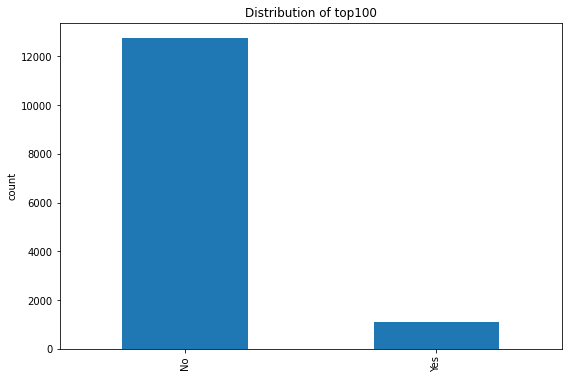

In [162]:
print(spotify['top100'].value_counts())

spotify['top100'].value_counts().plot.bar()
plt.ylabel('count')
plt.title('Distribution of top100')
plt.show()

### **2) 의사결정나무 모델** ###


In [163]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X = spotify.iloc[:, [3, 4, 5, 6, 7]]  # 5개 변수 
y = spotify.iloc[:, 8]   # top-100으로 설정

# 데이터셋을 학습(train)과 테스트(test) 세트로 분할
# random_state : random 으로 분할시 사용되는 난수 seed 숫자
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify=y, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

tree = DecisionTreeClassifier(class_weight = "balanced", random_state=0)   #데이터 균형 맞춰주기
tree.fit(X_train, y_train)  #(학습용 데이터 작성)
print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 1.000
시험용 데이터 정확도: 0.988


In [164]:
# 의사결정나무의 깊이를 4로 제한하면 시험용 데이터에 대한 성능이 향상됨 (과적합을 줄임)
#가중치 고려, 해당 모델 선택
tree = DecisionTreeClassifier(class_weight = "balanced", max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 0.915
시험용 데이터 정확도: 0.912


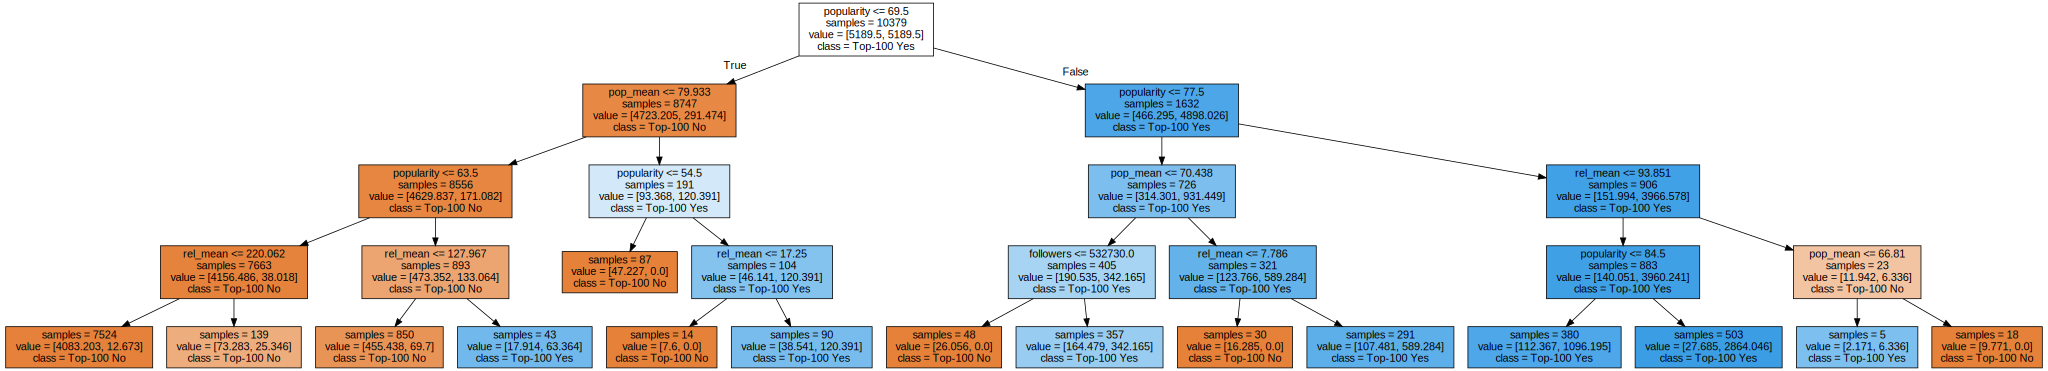

In [165]:
#graphviz 라이브러리를 이용하여 의사결정나무 그리기 
from sklearn.tree import export_graphviz
import graphviz

# filled = True: 색상의 진하기로 클래스를 나타냄, impurity: 불순도 계산값 보여주기 옵션
export_graphviz(tree, out_file="tree.dot", class_names=[ "Top-100 No", "Top-100 Yes"],
                feature_names=spotify.columns[[3, 4, 5, 6, 7]], impurity=False, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

#(어떤 순서로 중요한지 확인 가능)

In [166]:
result = tree.feature_importances_
print("변수의 중요도:\n", result)

변수의 중요도:
 [0.93449971 0.00531473 0.03282878 0.02735678 0.        ]


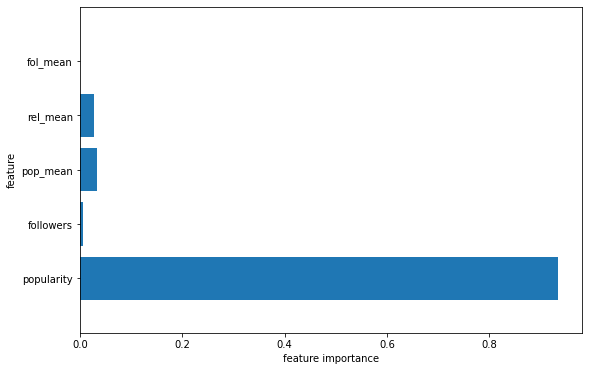

In [167]:
import numpy as np

def plot_feature_importances_spotify(model):
    plt.rcParams["figure.figsize"] = (9,6)
    n_features = len(spotify.columns[[3, 4, 5, 6, 7]])  # 5개 
    plt.barh(np.arange(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), spotify.columns[[3, 4, 5, 6, 7]])   # 5개의 눈금을 표시하고 눈금 레이블을 변수 이름으로 지정
    plt.xlabel("feature importance")
    plt.ylabel("feature")
    plt.ylim(-1, n_features) #Y 축 범위 지정

plot_feature_importances_spotify(tree)

#(0이라고 해서 중요하지 않은 것 아님)

### **3) 앙상블 모델: 랜덤 포레스트** ###

In [168]:
from sklearn.ensemble import RandomForestClassifier

# 30개 변수를 모두 이용하여 100개의 나무 생성 (정확도가 높아짐)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("학습용 데이터 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))

학습용 데이터 세트 정확도: 1.000
시험용 데이터 세트 정확도: 0.993


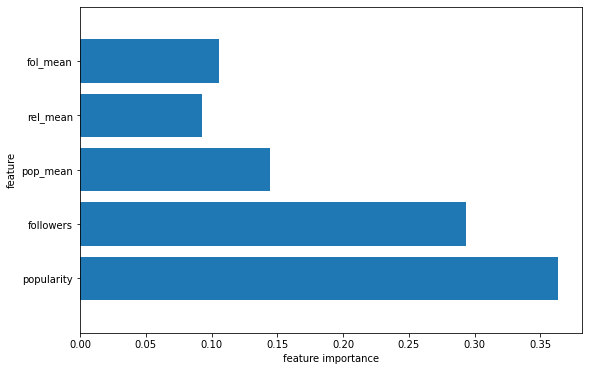

In [169]:
# 단일 의사결정나무의 경우보다 많은 변수(feature)들이 사용됨
plot_feature_importances_spotify(forest) 

In [170]:
from sklearn.model_selection import cross_val_score

# 교차 검증을 10번 수행하여 10번의 교차 검증 평균 정확도를 비교 (10-fold cross validation)
# default cv=5

dt_scores = cross_val_score(tree, X_train, y_train, cv=10, scoring='accuracy')  
rf_scores = cross_val_score(forest, X_train, y_train, cv=10, scoring='accuracy')

print("Accuracy")
print("Decision tree: ", dt_scores) 
print("Random forest: ", rf_scores) 

print("Accuracy mean")
print("Decision tree :{:.3f}".format(dt_scores.mean())) 
print("Random forest :{:.3f}".format(rf_scores.mean()))

Accuracy
Decision tree:  [0.91136802 0.90655106 0.90944123 0.91811175 0.9132948  0.9026975
 0.91811175 0.91811175 0.90751445 0.91224687]
Random forest:  [0.9894027  0.99518304 0.99518304 0.99325626 0.99614644 0.99325626
 0.99807322 0.99325626 0.99518304 0.99132112]
Accuracy mean
Decision tree :0.912
Random forest :0.994


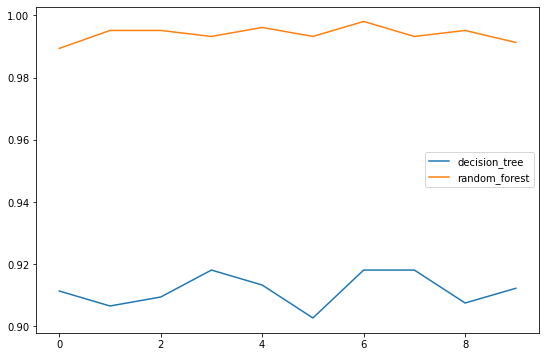

In [171]:
cv_list = [    
            ['decision_tree',dt_scores],
            ['random_forest',rf_scores],
          ]
df = pd.DataFrame.from_dict(dict(cv_list))
df.plot()

### **4) 앙상블 모델: 그래디언트 부스팅** ###

In [172]:
from sklearn.ensemble import GradientBoostingClassifier
# 기본값은 max_depth= 3, n_estimators=100, learning_rate = 0.1

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(random_state=0)

In [173]:
print("학습용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

학습용 데이터 세트 정확도: 0.983
시험용 데이터 세트 정확도: 0.975


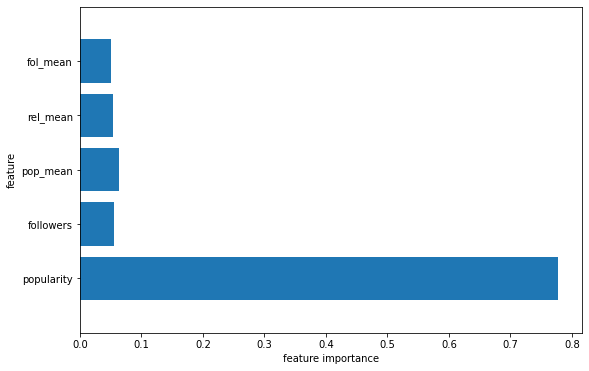

In [174]:
plot_feature_importances_spotify(gbrt)

In [175]:
#나무 깊이 제한
gbrt = GradientBoostingClassifier(random_state=0, max_depth=2)
gbrt.fit(X_train, y_train)

print("학습 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

학습 데이터 세트 정확도: 0.973
시험용 데이터 세트 정확도: 0.969


In [176]:
#학습률 감소
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("학습 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

학습 데이터 세트 정확도: 0.961
시험용 데이터 세트 정확도: 0.960


### **5) 분류모델 평가** ###

### 분류 모델 선택 및 평가 결과

* 선택한 평가: Accuracy(정확도) 
* 최적의 분류모델: 랜덤 포레스트

교차검증을 시도한 결과, 랜덤 포레스트 모델에서 0.994의 가장 높은 정확도를
보였으며, 정오 분류표에서도 정확도가 0.993으로 가장 높은 결과를 도출했기에 최적의 분류모델로 판단했다.

#### 1. 교차검증 ####

In [177]:
# 교차 검증을 10번 수행하여 10번의 교차 검증 평균 정확도를 비교 (10-fold cross validation)

dt_scores = cross_val_score(tree, X_train, y_train, cv=10, scoring='accuracy')  
rf_scores = cross_val_score(forest, X_train, y_train, cv=10, scoring='accuracy')
gbrt_scores = cross_val_score(gbrt, X_train, y_train, cv=10, scoring='accuracy')

print("Accuracy")
print("Decision tree: ", dt_scores) 
print("Random forest: ", rf_scores) 
print("Gradient boosting: ", gbrt_scores) 

print("Accuracy mean")
print("Decision tree :{:.3f}".format(dt_scores.mean())) 
print("Random forest :{:.3f}".format(rf_scores.mean())) 
print("Gradient boosting :{:.3f}".format(gbrt_scores.mean())) 

Accuracy
Decision tree:  [0.91136802 0.90655106 0.90944123 0.91811175 0.9132948  0.9026975
 0.91811175 0.91811175 0.90751445 0.91224687]
Random forest:  [0.9894027  0.99518304 0.99518304 0.99325626 0.99614644 0.99325626
 0.99807322 0.99325626 0.99518304 0.99132112]
Gradient boosting:  [0.95857418 0.95761079 0.95953757 0.96242775 0.95761079 0.95953757
 0.96242775 0.96050096 0.9672447  0.96142719]
Accuracy mean
Decision tree :0.912
Random forest :0.994
Gradient boosting :0.961


#### 2. 그리드 서치 ####

In [178]:
from sklearn.model_selection import GridSearchCV

# 파라미터를 dictionary 형태로 설정
parameters = {'max_depth':[1,2,3], 'learning_rate':[0.1,0.08, 0.06, 0.04, 0.02]}

In [179]:
# param_grid의 파라미터들을 3개의 fold 로 나누어 검증
# refit=True (기본값): 가장 좋은 파라미터 설정으로 재학습  
init_gbrt = GradientBoostingClassifier(random_state=0)
grid_gbrt = GridSearchCV(init_gbrt, param_grid=parameters, cv=3, refit=True)
print(grid_gbrt)
# 파라미터들을 순차적으로 학습, 검증
grid_gbrt.fit(X_train, y_train)

# GridSearchCV 결과 추출하여 DataFrame으로 변환
scores_df = pd.DataFrame(grid_gbrt.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score']]

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=0),
             param_grid={'learning_rate': [0.1, 0.08, 0.06, 0.04, 0.02],
                         'max_depth': [1, 2, 3]})


,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'learning_rate': 0.1, 'max_depth': 1}",0.961943,10,0.959827,0.962428,0.963573
1,"{'learning_rate': 0.1, 'max_depth': 2}",0.968976,4,0.965607,0.969364,0.971957
2,"{'learning_rate': 0.1, 'max_depth': 3}",0.975528,1,0.974855,0.973988,0.977739
3,"{'learning_rate': 0.08, 'max_depth': 1}",0.961653,11,0.959249,0.962428,0.963284
4,"{'learning_rate': 0.08, 'max_depth': 2}",0.967338,6,0.963873,0.969364,0.968777
5,"{'learning_rate': 0.08, 'max_depth': 3}",0.973986,2,0.972254,0.974855,0.974848
6,"{'learning_rate': 0.06, 'max_depth': 1}",0.960401,14,0.960116,0.962139,0.958948
7,"{'learning_rate': 0.06, 'max_depth': 2}",0.965218,8,0.963006,0.964740,0.967910
8,"{'learning_rate': 0.06, 'max_depth': 3}",0.970614,3,0.968497,0.971676,0.971668
9,"{'learning_rate': 0.04, 'max_depth': 1}",0.960786,13,0.958960,0.961561,0.961839


In [180]:
print('GridSearchCV 최적 파라미터:', grid_gbrt.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_gbrt.best_score_))

GridSearchCV 최적 파라미터: {'learning_rate': 0.1, 'max_depth': 3}
GridSearchCV 최고 정확도: 0.9755


In [181]:
# 최적 파라미터로 학습이 된 모델을 이용하여 시험용 데이터 세트 분류
print("시험용 데이터 세트 정확도: {:.3f}".format(grid_gbrt.score(X_test, y_test)))

시험용 데이터 세트 정확도: 0.975


#### 3. 모델평가지표: 정오분류표 ####

In [182]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix 

print(y_test.value_counts()) # y_test 의 B,M 분포

dt_pred = tree.predict(X_test)
rf_pred = forest.predict(X_test)
grid_gbrt_pred = grid_gbrt.predict(X_test)

# 예측 결과인 pred와 실제 결과인 y_test의 Confusion Matrix 출력
print('Decision tree 시험용 데이터 세트 정확도:{:.3f}'.format(accuracy_score(y_test, dt_pred)))
print(confusion_matrix(y_test, dt_pred))
print('Random forest 시험용 데이터 세트 정확도:{:.3f}'.format(accuracy_score(y_test, rf_pred)))
print(confusion_matrix(y_test, rf_pred))
print('Gradient boosting 시험용 데이터 세트 정확도:{:.3f}'.format(accuracy_score(y_test, grid_gbrt_pred)))
print(confusion_matrix(y_test, grid_gbrt_pred))

No     3181
Yes     279
Name: top100, dtype: int64
Decision tree 시험용 데이터 세트 정확도:0.912
[[2886  295]
 [   8  271]]
Random forest 시험용 데이터 세트 정확도:0.993
[[3168   13]
 [  10  269]]
Gradient boosting 시험용 데이터 세트 정확도:0.975
[[3151   30]
 [  58  221]]


In [183]:
from sklearn.metrics import classification_report

# 각 클래스가 Positive일 때의 정밀도, 재현율, f1 값을 보여줌 ("M"이 Postivit인 경우가 기본값임)
# macro avg는 클래스별 점수의 평균을 계산
# weighted avg는 클래스의 샘플 수로 가중평균을 계산
print("Decision Tree:")
print(classification_report(y_test, dt_pred, target_names=["No", "Yes"]))
print("Random Forest:")
print(classification_report(y_test, rf_pred, target_names=["No", "Yes"]))
print("Gradient Boosting:")
print(classification_report(y_test, grid_gbrt_pred, target_names=["No", "Yes"]))

Decision Tree:
              precision    recall  f1-score   support

          No       1.00      0.91      0.95      3181
         Yes       0.48      0.97      0.64       279

    accuracy                           0.91      3460
   macro avg       0.74      0.94      0.80      3460
weighted avg       0.96      0.91      0.93      3460

Random Forest:
              precision    recall  f1-score   support

          No       1.00      1.00      1.00      3181
         Yes       0.95      0.96      0.96       279

    accuracy                           0.99      3460
   macro avg       0.98      0.98      0.98      3460
weighted avg       0.99      0.99      0.99      3460

Gradient Boosting:
              precision    recall  f1-score   support

          No       0.98      0.99      0.99      3181
         Yes       0.88      0.79      0.83       279

    accuracy                           0.97      3460
   macro avg       0.93      0.89      0.91      3460
weighted avg       0.97  

### 인사이트 도출

3가지 분석모델에서 모두 popularity 변수의 중요도가 월등히 높았다.
의사결정나무와 그래디언트 부스팅 모델에서는 pop_mean 변수가, 그리고 랜덤 포레스트 모델에서는 followers 변수가 그 뒤를 이었다.

* 제일 정확도가 높은 random forest 모델의 결과를 참고한다면, 아티스트의 성공을 예측하기 위해서는 popularity 변수와 followers 변수를 참고하는 것이 가장 중요할 것으로 추측된다. 
* 위 결과에 따라서 아티스트의 성공을 위해서는 스포티파이 앨범에서의 좋아요(popularity) 개수와 아티스트의 팔로워 수를 올릴 수 있는 전략을 수립할 필요가 있다.

##**Step 2-2. 분류**

### 분류 문제 선정: 인기도에 영향을 미치는 변수에 따라 아티스트의 성공 전략 수립하기

* 종속변수: popularity 

* 독립변수: 각종 음악관련 수치들(곡의 분위기, 피치, 가사의 양, 음의 양 등)

Yes: 인기도 50이상
No: 인기도 50미만

어떤 독립변수가 스포티파이 인기도부분에 영향을 주는지 확인한다

결과에 무관하게 세운 가정: 노래가 어떤 분위기인지가 영향을 많이 줄 것으로 생각된다.

### **1) songs 전처리(이지우 참여)** ###

In [184]:
songs = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Bigmining/songs_normalize.csv", encoding='cp949')

In [185]:
songs.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,FALSE,2000,77.0,0.751,0.834,1.0,-5.444,0.0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,FALSE,1999,79.0,0.434,0.897,0.0,-4.918,1.0,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,FALSE,1999,66.0,0.529,0.496,7.0,-9.007,1.0,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,FALSE,2000,78.0,0.551,0.913,0.0,-4.063,0.0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,FALSE,2000,65.0,0.614,0.928,8.0,-4.806,0.0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


In [186]:
print(songs.isnull().sum())

artist              0
song                0
duration_ms         0
explicit            0
year                0
popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
genre               1
dtype: int64


In [187]:
# 결측치 열 전체 삭제
songs = songs.dropna(axis=1)   #열삭제의 경우 axis =1 
print("결측열 모두 제거: ", songs.shape)    # 결측치 모두 없어졌는지 확인

songs = songs.drop(columns = ['duration_ms','explicit','mode'],axis=1)

print(songs.isnull().sum())

결측열 모두 제거:  (2000, 17)
artist              0
song                0
year                0
popularity          0
danceability        0
energy              0
key                 0
loudness            0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
dtype: int64


In [188]:
display(songs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              2000 non-null   object 
 2   year              2000 non-null   int64  
 3   popularity        2000 non-null   float64
 4   danceability      2000 non-null   float64
 5   energy            2000 non-null   float64
 6   key               2000 non-null   float64
 7   loudness          2000 non-null   float64
 8   speechiness       2000 non-null   float64
 9   acousticness      2000 non-null   float64
 10  instrumentalness  2000 non-null   float64
 11  liveness          2000 non-null   float64
 12  valence           2000 non-null   float64
 13  tempo             2000 non-null   object 
dtypes: float64(10), int64(1), object(3)
memory usage: 218.9+ KB


None

In [189]:
rating = []
    
for row in songs['popularity']:
      if row >= 50 :  rating.append('Yes')
      else: rating.append('No')

songs['popularity'] = rating
print(songs)

              artist                                    song  year popularity  \
0     Britney Spears                  Oops!...I Did It Again  2000        Yes   
1          blink-182                    All The Small Things  1999        Yes   
2         Faith Hill                                 Breathe  1999        Yes   
3           Bon Jovi                            It's My Life  2000        Yes   
4             *NSYNC                             Bye Bye Bye  2000        Yes   
...              ...                                     ...   ...        ...   
1995  Jonas Brothers                                  Sucker  2019        Yes   
1996    Taylor Swift                            Cruel Summer  2019        Yes   
1997    Blanco Brown                              The Git Up  2019        Yes   
1998       Sam Smith  Dancing With A Stranger (with Normani)  2019        Yes   
1999     Post Malone                                 Circles  2019        Yes   

      danceability  energy 

In [190]:
display(songs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              2000 non-null   object 
 2   year              2000 non-null   int64  
 3   popularity        2000 non-null   object 
 4   danceability      2000 non-null   float64
 5   energy            2000 non-null   float64
 6   key               2000 non-null   float64
 7   loudness          2000 non-null   float64
 8   speechiness       2000 non-null   float64
 9   acousticness      2000 non-null   float64
 10  instrumentalness  2000 non-null   float64
 11  liveness          2000 non-null   float64
 12  valence           2000 non-null   float64
 13  tempo             2000 non-null   object 
dtypes: float64(9), int64(1), object(4)
memory usage: 218.9+ KB


None

Yes    1681
No      319
Name: popularity, dtype: int64


Text(0.5, 1.0, 'Distribution of popularity')

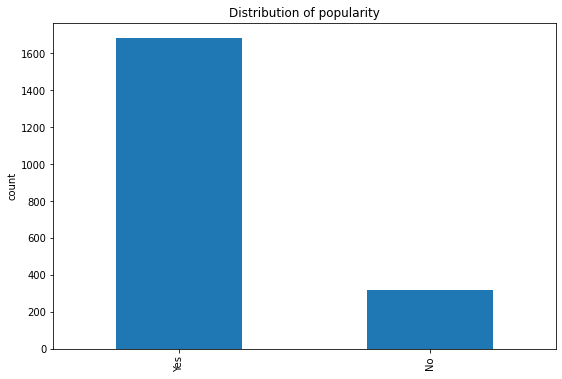

In [191]:
print(songs['popularity'].value_counts())

songs['popularity'].value_counts().plot.bar()
plt.ylabel('count')
plt.title('Distribution of popularity')

### **2) 의사결정나무 모델** ###

In [192]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X = songs.iloc[:, [4, 5, 6, 7, 8, 9, 10, 11, 12]]  # 9개 변수 
y = songs.iloc[:, 3]   # popularity로 설정

# 데이터셋을 학습(train)과 테스트(test) 세트로 분할
# random_state : random 으로 분할시 사용되는 난수 seed 숫자
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify=y, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

tree = DecisionTreeClassifier(class_weight = "balanced", random_state=0)   #데이터 균형 맞춰주기
tree.fit(X_train, y_train)  #(학습용 데이터 작성)
print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 1.000
시험용 데이터 정확도: 0.736


In [193]:
# 의사결정나무의 깊이를 4로 제한하면 시험용 데이터에 대한 성능이 향상됨 (과적합을 줄임)
#가중치 고려, 해당 모델 선택
tree = DecisionTreeClassifier(class_weight = "balanced", max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 0.768
시험용 데이터 정확도: 0.708


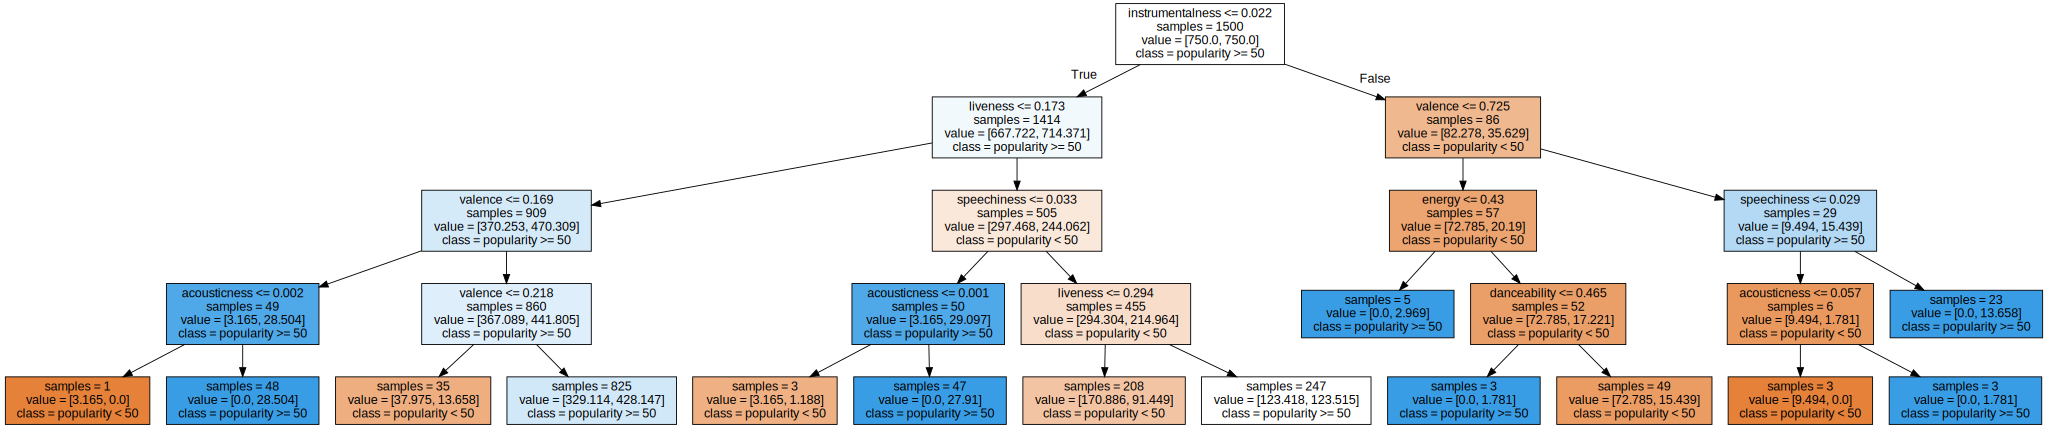

In [194]:
#graphviz 라이브러리를 이용하여 의사결정나무 그리기 
from sklearn.tree import export_graphviz
import graphviz

# filled = True: 색상의 진하기로 클래스를 나타냄, impurity: 불순도 계산값 보여주기 옵션
export_graphviz(tree, out_file="tree.dot", class_names=[ "popularity < 50", "popularity >= 50"],
                feature_names=songs.columns[[4, 5, 6, 7, 8, 9, 10, 11, 12]], impurity=False, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

#(어떤 순서로 중요한지 확인 가능)

In [195]:
result = tree.feature_importances_
print("변수의 중요도:\n", result)

변수의 중요도:
 [0.02702823 0.04274536 0.         0.         0.25842006 0.14415509
 0.11388105 0.15518902 0.25858119]


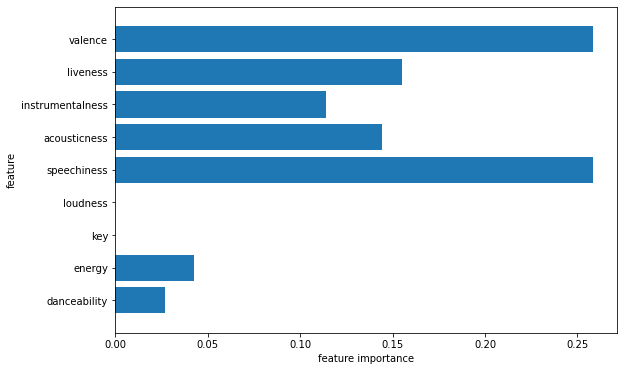

In [196]:
import numpy as np

def plot_feature_importances_songs(model):
    plt.rcParams["figure.figsize"] = (9,6)
    n_features = len(songs.columns[[4, 5, 6, 7, 8, 9, 10, 11, 12]])  # 9개 
    plt.barh(np.arange(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), songs.columns[[4, 5, 6, 7, 8, 9, 10, 11, 12]])   # 9개의 눈금을 표시하고 눈금 레이블을 변수 이름으로 지정
    plt.xlabel("feature importance")
    plt.ylabel("feature")
    plt.ylim(-1, n_features) #Y 축 범위 지정

plot_feature_importances_songs(tree)

#(0이라고 해서 중요하지 않은 것 아님)

### **3) 앙상블 모델: 랜덤 포레스트** ###

In [197]:
from sklearn.ensemble import RandomForestClassifier

# 30개 변수를 모두 이용하여 100개의 나무 생성 (정확도가 높아짐)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("학습용 데이터 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))

학습용 데이터 세트 정확도: 1.000
시험용 데이터 세트 정확도: 0.832


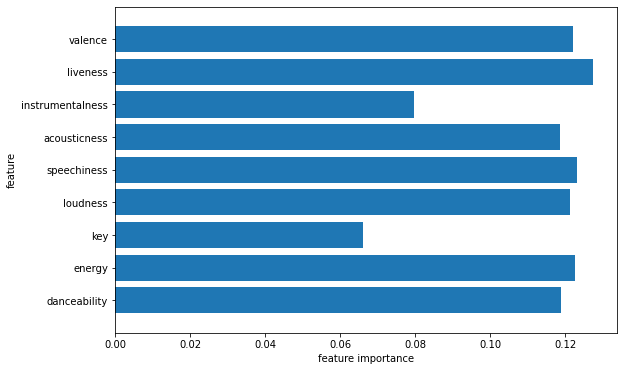

In [198]:
# 단일 의사결정나무의 경우보다 많은 변수(feature)들이 사용됨
plot_feature_importances_songs(forest)

In [199]:
from sklearn.model_selection import cross_val_score

# 교차 검증을 10번 수행하여 10번의 교차 검증 평균 정확도를 비교 (10-fold cross validation)
# default cv=5

dt_scores = cross_val_score(tree, X_train, y_train, cv=10, scoring='accuracy')  
rf_scores = cross_val_score(forest, X_train, y_train, cv=10, scoring='accuracy')

print("Accuracy")
print("Decision tree: ", dt_scores) 
print("Random forest: ", rf_scores) 

print("Accuracy mean")
print("Decision tree :{:.3f}".format(dt_scores.mean()))
print("Random forest :{:.3f}".format(rf_scores.mean()))

Accuracy
Decision tree:  [0.6        0.63333333 0.7        0.71333333 0.52666667 0.33333333
 0.67333333 0.73333333 0.61333333 0.44666667]
Random forest:  [0.84666667 0.85333333 0.86       0.84       0.84       0.84666667
 0.84       0.84666667 0.83333333 0.84      ]
Accuracy mean
Decision tree :0.597
Random forest :0.845


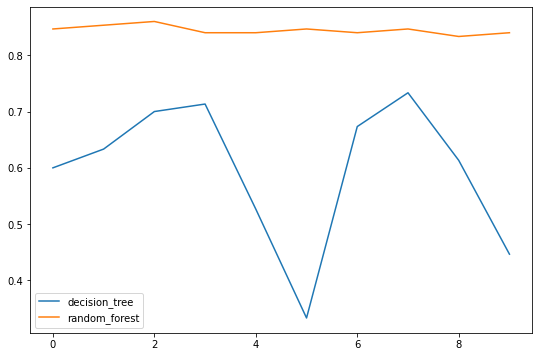

In [200]:
cv_list = [    
            ['decision_tree',dt_scores],
            ['random_forest',rf_scores],
          ]
df = pd.DataFrame.from_dict(dict(cv_list))
df.plot()

### **4) 앙상블 모델: 그래디언트 부스팅** ###

In [201]:
from sklearn.ensemble import GradientBoostingClassifier
# 기본값은 max_depth= 3, n_estimators=100, learning_rate = 0.1

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(random_state=0)

In [202]:
print("학습용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

학습용 데이터 세트 정확도: 0.870
시험용 데이터 세트 정확도: 0.832


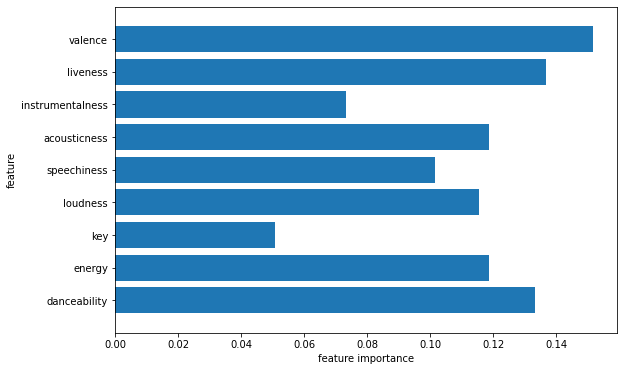

In [203]:
plot_feature_importances_songs(gbrt)

In [204]:
#나무 깊이 제한
gbrt = GradientBoostingClassifier(random_state=0, max_depth=2)
gbrt.fit(X_train, y_train)

print("학습 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

학습 데이터 세트 정확도: 0.852
시험용 데이터 세트 정확도: 0.834


In [205]:
#학습률 감소
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("학습 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

학습 데이터 세트 정확도: 0.843
시험용 데이터 세트 정확도: 0.834


### **5) 분류모델 평가** ###

### 분류 모델 선택 및 평가 결과

* 선택한 평가: Accuracy(정확도) 
* 최적의 분류모델: 그래디언트 부스팅

교차검증을 시도한 결과, 랜덤 포레스트 모델에서 0.994의 가장 높은 정확도를
보였으며, 정오 분류표에서도 정확도가 0.993으로 가장 높은 결과를 도출했기에 최적의 분류모델로 판단했다.

#### 1. 교차검증

In [206]:
# 교차 검증을 10번 수행하여 10번의 교차 검증 평균 정확도를 비교 (10-fold cross validation)

dt_scores = cross_val_score(tree, X_train, y_train, cv=10, scoring='accuracy')  
rf_scores = cross_val_score(forest, X_train, y_train, cv=10, scoring='accuracy')
gbrt_scores = cross_val_score(gbrt, X_train, y_train, cv=10, scoring='accuracy')

print("Accuracy")
print("Decision tree: ", dt_scores) 
print("Random forest: ", rf_scores) 
print("Gradient boosting: ", gbrt_scores) 

print("Accuracy mean")
print("Decision tree :{:.3f}".format(dt_scores.mean())) 
print("Random forest :{:.3f}".format(rf_scores.mean()))
print("Gradient boosting :{:.3f}".format(gbrt_scores.mean()))

Accuracy
Decision tree:  [0.6        0.63333333 0.7        0.71333333 0.52666667 0.33333333
 0.67333333 0.73333333 0.61333333 0.44666667]
Random forest:  [0.84666667 0.85333333 0.86       0.84       0.84       0.84666667
 0.84       0.84666667 0.83333333 0.84      ]
Gradient boosting:  [0.84666667 0.84666667 0.84666667 0.84       0.84       0.84
 0.84       0.84       0.84       0.84      ]
Accuracy mean
Decision tree :0.597
Random forest :0.845
Gradient boosting :0.842


#### 2. 그리드 서치

In [207]:
from sklearn.model_selection import GridSearchCV

# 파라미터를 dictionary 형태로 설정
parameters = {'max_depth':[1,2,3], 'learning_rate':[0.1,0.08, 0.06, 0.04, 0.02]}

In [208]:
# param_grid의 파라미터들을 3개의 fold 로 나누어 검증
# refit=True (기본값): 가장 좋은 파라미터 설정으로 재학습  
init_gbrt = GradientBoostingClassifier(random_state=0)
grid_gbrt = GridSearchCV(init_gbrt, param_grid=parameters, cv=3, refit=True)
print(grid_gbrt)
# 파라미터들을 순차적으로 학습, 검증
grid_gbrt.fit(X_train, y_train)

# GridSearchCV 결과 추출하여 DataFrame으로 변환
scores_df = pd.DataFrame(grid_gbrt.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score']]

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=0),
             param_grid={'learning_rate': [0.1, 0.08, 0.06, 0.04, 0.02],
                         'max_depth': [1, 2, 3]})


,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'learning_rate': 0.1, 'max_depth': 1}",0.841333,8,0.840,0.842,0.842
1,"{'learning_rate': 0.1, 'max_depth': 2}",0.843333,1,0.842,0.844,0.844
2,"{'learning_rate': 0.1, 'max_depth': 3}",0.836000,15,0.840,0.838,0.830
3,"{'learning_rate': 0.08, 'max_depth': 1}",0.841333,8,0.840,0.842,0.842
4,"{'learning_rate': 0.08, 'max_depth': 2}",0.840667,11,0.840,0.844,0.838
5,"{'learning_rate': 0.08, 'max_depth': 3}",0.838000,13,0.836,0.844,0.834
6,"{'learning_rate': 0.06, 'max_depth': 1}",0.842000,3,0.842,0.842,0.842
7,"{'learning_rate': 0.06, 'max_depth': 2}",0.841333,8,0.842,0.842,0.840
8,"{'learning_rate': 0.06, 'max_depth': 3}",0.837333,14,0.840,0.838,0.834
9,"{'learning_rate': 0.04, 'max_depth': 1}",0.842000,3,0.842,0.842,0.842


In [209]:
# 최적 파라미터로 학습이 된 모델을 이용하여 시험용 데이터 세트 분류
print("시험용 데이터 세트 정확도: {:.3f}".format(grid_gbrt.score(X_test, y_test)))

시험용 데이터 세트 정확도: 0.834


#### 3. 모델평가지표: 정오분류표

In [210]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix 

print(y_test.value_counts()) # y_test 의 B,M 분포

dt_pred = tree.predict(X_test)
rf_pred = forest.predict(X_test)
grid_gbrt_pred = grid_gbrt.predict(X_test)

# 예측 결과인 pred와 실제 결과인 y_test의 Confusion Matrix 출력
print('Decision tree 시험용 데이터 세트 정확도:{:.3f}'.format(accuracy_score(y_test, dt_pred)))
print(confusion_matrix(y_test, dt_pred))
print('Random forest 시험용 데이터 세트 정확도:{:.3f}'.format(accuracy_score(y_test, rf_pred)))
print(confusion_matrix(y_test, rf_pred))
print('Gradient boosting 시험용 데이터 세트 정확도:{:.3f}'.format(accuracy_score(y_test, grid_gbrt_pred)))
print(confusion_matrix(y_test, grid_gbrt_pred))

Yes    418
No      82
Name: popularity, dtype: int64
Decision tree 시험용 데이터 세트 정확도:0.708
[[ 17  65]
 [ 81 337]]
Random forest 시험용 데이터 세트 정확도:0.832
[[  2  80]
 [  4 414]]
Gradient boosting 시험용 데이터 세트 정확도:0.834
[[  0  82]
 [  1 417]]


In [211]:
from sklearn.metrics import classification_report

# 각 클래스가 Positive일 때의 정밀도, 재현율, f1 값을 보여줌 ("M"이 Postivit인 경우가 기본값임)
# macro avg는 클래스별 점수의 평균을 계산
# weighted avg는 클래스의 샘플 수로 가중평균을 계산
print("Decision Tree:")
print(classification_report(y_test, dt_pred, target_names=["No", "Yes"]))
print("Random Forest:")
print(classification_report(y_test, rf_pred, target_names=["No", "Yes"]))
print("Gradient Boosting:")
print(classification_report(y_test, grid_gbrt_pred, target_names=["No", "Yes"]))

Decision Tree:
              precision    recall  f1-score   support

          No       0.17      0.21      0.19        82
         Yes       0.84      0.81      0.82       418

    accuracy                           0.71       500
   macro avg       0.51      0.51      0.51       500
weighted avg       0.73      0.71      0.72       500

Random Forest:
              precision    recall  f1-score   support

          No       0.33      0.02      0.05        82
         Yes       0.84      0.99      0.91       418

    accuracy                           0.83       500
   macro avg       0.59      0.51      0.48       500
weighted avg       0.76      0.83      0.77       500

Gradient Boosting:
              precision    recall  f1-score   support

          No       0.00      0.00      0.00        82
         Yes       0.84      1.00      0.91       418

    accuracy                           0.83       500
   macro avg       0.42      0.50      0.45       500
weighted avg       0.70  

### **인사이트 도출**

##**Step 3. 군집분석**
